# Reasons for sampling

Sampling is an important technique in your statistical arsenal. It isn't always appropriate though—you need to know when to use it and when to work with the whole dataset.

Which of the following is not a good scenario to use sampling?

- You've finished collecting data on a small study of the wing measurements for 10 butterflies.

# Simple sampling with pandas

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [3]:
import pandas as pd
spotify_population = pd.read_feather("dataset/spotify_2000_2020.feather")

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                      artists  danceability  duration_ms  \
13551       0.70200        ['The White Buffalo']         0.371     236333.0   
1507        0.09870                  ['Iration']         0.630     236333.0   
19364       0.00439                  ['Volován']         0.582     237760.0   
31667       0.00741          ['Jimmy Eat World']         0.544     203507.0   
39791       0.01000    ['Red Hot Chili Peppers']         0.426     217200.0   
...             ...                          ...           ...          ...   
13578       0.06310         ['Sharon Van Etten']         0.596     283573.0   
19378       0.00257         ['The Flaming Lips']         0.636     232520.0   
26382       0.88200             ['Jason Isbell']         0.429     293973.0   
13875       0.89700  ['Rainbow Kitten Surprise']         0.404     158761.0   
13432       0.01050       ['Dorinda Clark-Cole']         0.738     404667.0   

       duration_minutes  energy  explicit          

# Simple sampling and calculating with NumPy

You can also use `numpy` to calculate parameters or statistics from a list or `pandas` Series.

You'll be turning it up to eleven and looking at the `loudness` property of each song.

In [4]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353918
-7.109749999999998


# Are findings from the sample generalizable?

You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the `acousticness` distribution of the total population of songs with a sample of those songs.

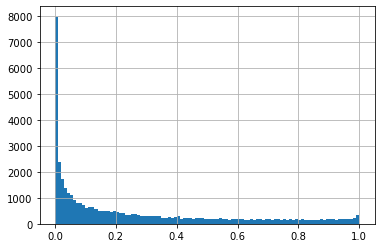

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins = np.arange(0,1.01,0.01))
plt.show()

In [8]:
# # Update the histogram to use spotify_mysterious_sample
# spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
# plt.show()

# Are these findings generalizable?

Let's look at another sample to see if it is representative of the population. This time, you'll look at the `duration_minutes` column of the Spotify dataset, which contains the length of the song in minutes.

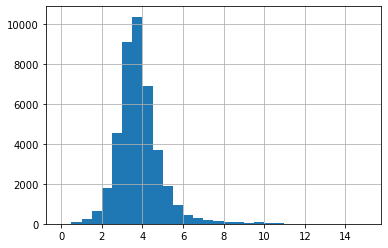

In [9]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins = np.arange(0,15.5,0.5))
plt.show()

In [10]:
# # Update the histogram to use spotify_mysterious_sample2
# spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
# plt.show()

# Generating random numbers

You've used `.sample()` to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.

Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.

In [11]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size = 5000)

# Print uniforms
print(uniforms)

[-2.2354283   0.11684929  2.46552301 ...  1.3886134   0.01769833
 -1.63788789]


In [12]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc = 5, scale = 2, size=5000)

# Print normals
print(normals)

[2.9222539  4.1963617  3.42956    ... 6.28508374 5.59852504 7.64876296]


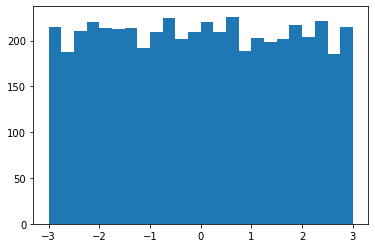

In [13]:
# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins = np.arange(-3,3.1,0.25))
plt.show()

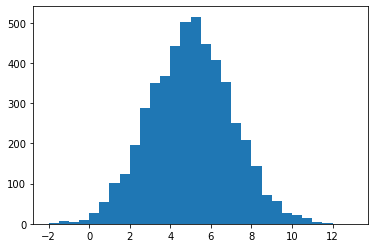

In [14]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins = np.arange(-2,13.1,0.5))
plt.show()

# Understanding random seeds

While random numbers are important for many analyses, they create a problem: the results you get can vary slightly. This can cause awkward conversations with your boss when your script for calculating the sales forecast gives different answers each time.

Setting the seed for `numpy`'s random number generator helps avoid such problems by making the random number generation reproducible.

In [15]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)

print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [16]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)

print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [17]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(124)
y = np.random.normal(size=5)

print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[ 0.28847906 -0.46295408 -1.33800442  2.31701567 -1.46737593]
